In [14]:
import tensorflow as tf
from keras import datasets, layers, callbacks, models, optimizers
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [4]:
# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
print(x_train.shape)

(60000, 28, 28)


In [9]:
model = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
finish_callback = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [17]:
r = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    callbacks=[finish_callback]
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9570 - loss: 0.1464 - val_accuracy: 0.9707 - val_loss: 0.0975
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9684 - loss: 0.1058 - val_accuracy: 0.9724 - val_loss: 0.0847
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9748 - loss: 0.0854 - val_accuracy: 0.9742 - val_loss: 0.0842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9788 - loss: 0.0694 - val_accuracy: 0.9760 - val_loss: 0.0815
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9792 - loss: 0.0640 - val_accuracy: 0.9769 - val_loss: 0.0767


In [18]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9723 - loss: 0.0927


[0.07668633759021759, 0.9768999814987183]

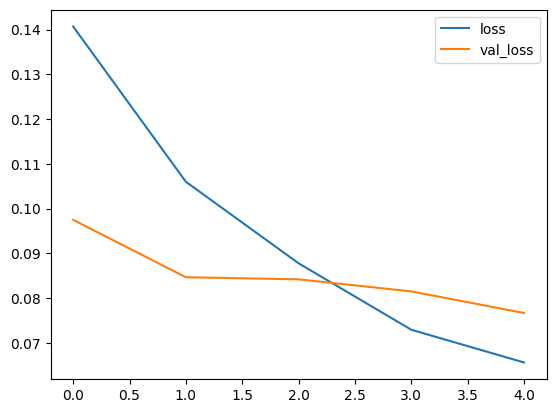

In [19]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

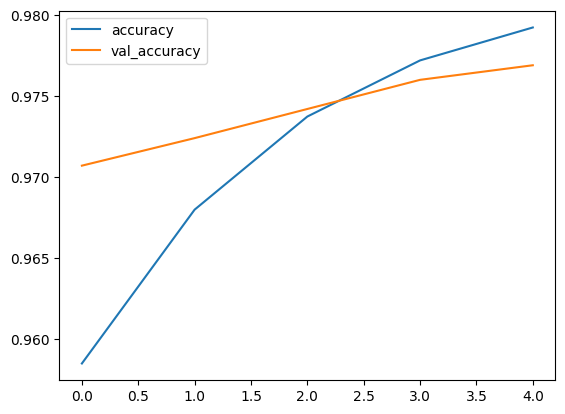

In [20]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    :param cm:
    :param classes:
    :param normalize:
    :param title:
    :param cmap:
    :return:
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion matrix, without normalization
[[ 971    0    1    1    2    1    1    1    2    0]
 [   0 1128    2    1    0    1    1    0    2    0]
 [   2    4 1000    5    3    0    2    5   11    0]
 [   0    0    4  996    0    2    0    4    4    0]
 [   0    0    5    1  968    0    3    2    0    3]
 [   2    0    0   12    0  865    7    1    3    2]
 [   3    3    1    1    4    5  940    0    1    0]
 [   1    7   10    4    2    0    0  998    1    5]
 [   4    0    3   10    4    2    3    3  942    3]
 [   2    2    0   11   21    1    1    8    2  961]]


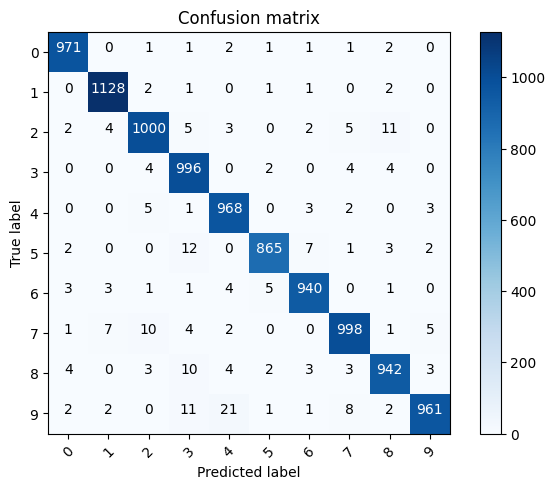

In [22]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 7, Predicted label: 9')

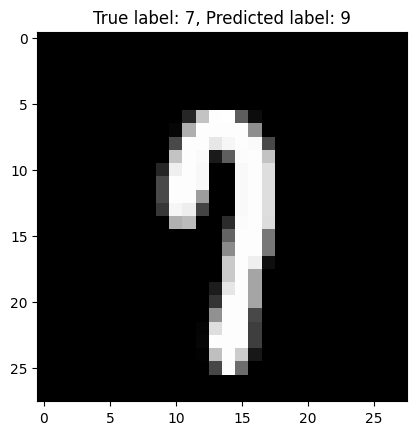

In [28]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True label: {y_test[i]}, Predicted label: {p_test[i]}")